In [15]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
warnings.filterwarnings('ignore')
import os

In [9]:
img_data='Downloads/capsule endoscopy'

In [13]:
img_size=(64,64)

In [19]:
x=[]
y=[]

for label in ['avm', 'normal', 'ulcer']:
    class_dir = os.path.join(img_data, label)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img).flatten()  # Load and flatten
        x.append(img_array)
        y.append(label)

In [21]:
x=np.array(x)
y=np.array(y)

In [23]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
y

array(['avm', 'avm', 'avm', ..., 'ulcer', 'ulcer', 'ulcer'], dtype='<U6')

In [31]:
df=pd.DataFrame(x)
df['label']=y

In [35]:
df

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,219.0,54.0,50.0,219.0,54.0,50.0,0.0,0.0,0.0,avm
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,219.0,54.0,50.0,219.0,54.0,50.0,0.0,0.0,0.0,avm
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,219.0,54.0,50.0,219.0,54.0,50.0,0.0,0.0,0.0,avm
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,219.0,54.0,50.0,219.0,54.0,50.0,0.0,0.0,0.0,avm
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,219.0,54.0,50.0,219.0,54.0,50.0,0.0,0.0,0.0,avm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,219.0,54.0,50.0,219.0,54.0,50.0,0.0,0.0,0.0,ulcer
3297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,219.0,54.0,50.0,219.0,54.0,50.0,0.0,0.0,0.0,ulcer
3298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,219.0,54.0,50.0,219.0,54.0,50.0,0.0,0.0,0.0,ulcer
3299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,219.0,54.0,50.0,219.0,54.0,50.0,0.0,0.0,0.0,ulcer


In [39]:
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
12284    0
12285    0
12286    0
12287    0
label    0
Length: 12289, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3301 entries, 0 to 3300
Columns: 12289 entries, 0 to label
dtypes: float32(12288), object(1)
memory usage: 154.8+ MB


In [44]:
df.duplicated().sum()

1

In [48]:
df.duplicated().value_counts(1)

False    0.999697
True     0.000303
Name: proportion, dtype: float64

In [52]:
df.drop_duplicates(inplace=True)

In [54]:
df.to_csv('capsule_endoscopy.csv',index=False)

In [56]:
df.duplicated().sum()

0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3300 entries, 0 to 3300
Columns: 12289 entries, 0 to label
dtypes: float32(12288), object(1)
memory usage: 154.7+ MB


In [62]:
le=LabelEncoder()
scaler=StandardScaler()

In [101]:
y_encode=le.fit_transform(y)

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y_encode,test_size=0.2,random_state=42)

In [109]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [113]:
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
lr=LogisticRegression()
svc=SVC(kernel='rbf')
nb=GaussianNB()
dt=DecisionTreeClassifier(random_state=0)

In [115]:
knn.fit(x_train,y_train)
rfc.fit(x_train,y_train)
lr.fit(x_train,y_train)
svc.fit(x_train,y_train)
nb.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [117]:
y_pred_knn=knn.predict(x_test)
y_pred_rfc=rfc.predict(x_test)
y_pred_lr=lr.predict(x_test)
y_pred_svc=svc.predict(x_test)
y_pred_nb=nb.predict(x_test)
y_pred_dt=dt.predict(x_test)

Confusion Matrix KNN : 


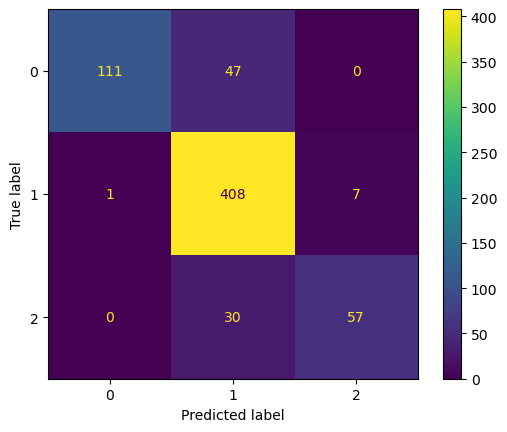

In [121]:
print("Confusion Matrix KNN : ")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)

Confusion Matrix RandomForest : 


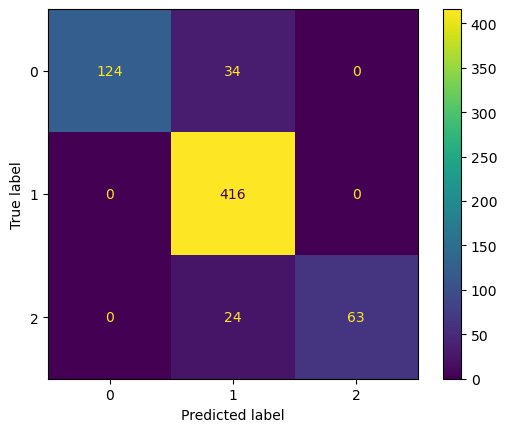

In [123]:
print("Confusion Matrix RandomForest : ")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc)

Confusion Matrix LinearRegression : 


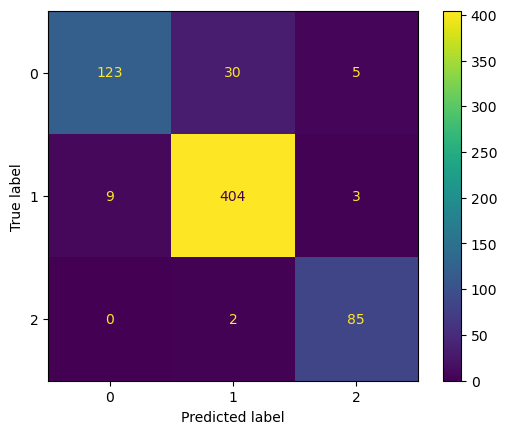

In [127]:
print("Confusion Matrix LinearRegression : ")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)

Confusion Matrix SVC : 


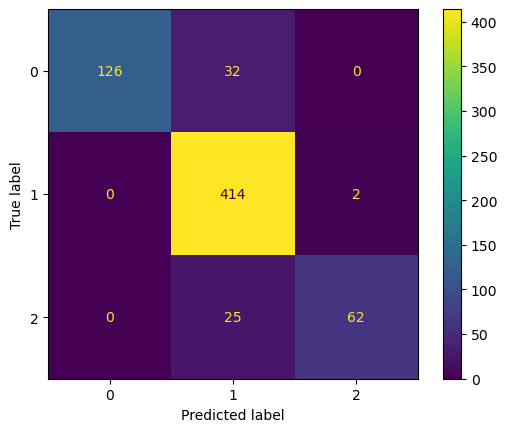

In [129]:
print("Confusion Matrix SVC : ")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc)

Confusion Matrix NaiveBayes : 


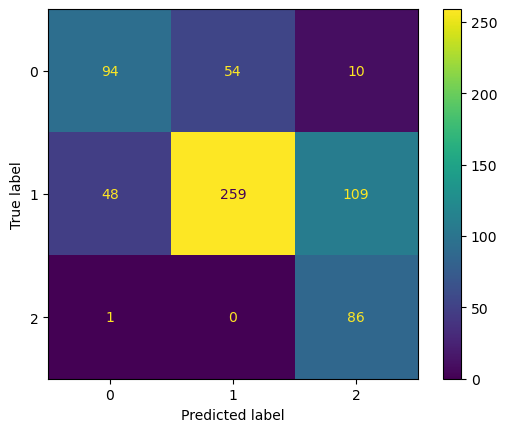

In [131]:
print("Confusion Matrix NaiveBayes : ")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb)

Confusion Matrix DecisionTree : 


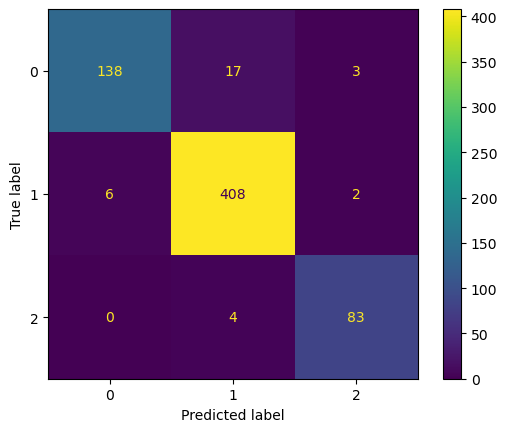

In [133]:
print("Confusion Matrix DecisionTree : ")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)

In [135]:
accuracy=accuracy_score(y_test,y_pred_knn)
print('knn : ',accuracy)

accuracy=accuracy_score(y_test,y_pred_rfc)
print('rfc : ',accuracy)

accuracy=accuracy_score(y_test,y_pred_lr)
print('lr : ',accuracy)

accuracy=accuracy_score(y_test,y_pred_nb)
print('nb : ',accuracy)

accuracy=accuracy_score(y_test,y_pred_dt)
print('dt : ',accuracy)

accuracy=accuracy_score(y_test,y_pred_svc)
print('svc : ',accuracy)

knn :  0.8714069591527988
rfc :  0.9122541603630863
lr :  0.9258698940998488
nb :  0.6641452344931922
dt :  0.9515885022692889
svc :  0.9107413010590015


In [137]:
from xgboost import XGBClassifier
xg=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [139]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [141]:
y_pred_xgb=xg.predict(x_test)

In [145]:
accuracy=accuracy_score(y_test,y_pred_xgb)
print('xgb : ',accuracy)

xgb :  0.9863842662632375


Confusion Matrix XGBoost : 


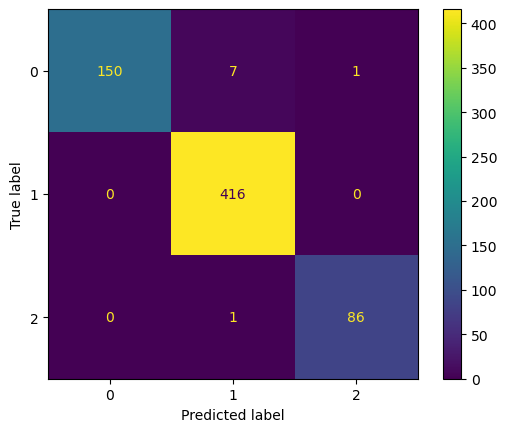

In [147]:
print("Confusion Matrix XGBoost : ")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xgb)

In [157]:
from sklearn.model_selection import GridSearchCV

In [149]:
# so we have to apply GridSearchCV
# Thus defining every hypereparameter

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}

rfc_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]}

lr_params = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100]}

svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']}

nb_params = {}

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]}

In [151]:
models = {
    'KNN': (knn, knn_params),
    'Random Forest': (rfc, rfc_params),
    'Logistic Regression': (lr, lr_params),
    'SVM': (svc, svc_params),
    'Naive Bayes': (nb, nb_params),
    'Decision Tree': (dt, dt_params)
}

In [165]:
best_model={}
for modelnm,(model,params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)

    best_model[modelnm] = grid.best_estimator_
    
    print("Best Parameters:", grid.best_params_)
    print("Best Accuracy:", grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy: 0.9049242424242424
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9049242424242424
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Accuracy: 0.9166666666666666
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Accuracy: 0.9337121212121211
Best Parameters: {}
Best Accuracy: 0.6787878787878787
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}
Best Accuracy: 0.9568181818181818


In [177]:
y_pred_cv=grid.predict(x_test)

In [179]:
accuracy_score(y_test,y_pred_cv)

0.9667170953101362

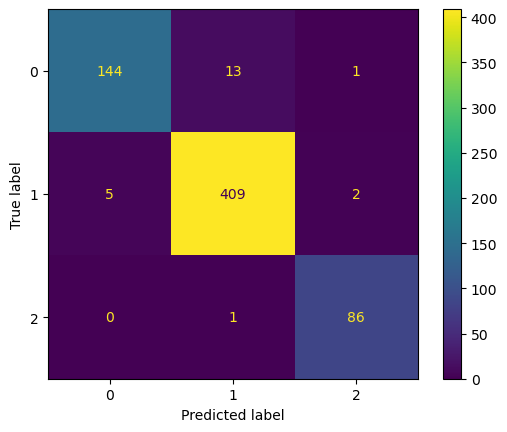

In [183]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_cv)

In [185]:
from sklearn.ensemble import StackingClassifier

In [191]:
stack = StackingClassifier(estimators=[('logistic',lr),
                                      ('decision tree',dt),
                                      ('naive bayes',nb),
                                      ('svc',svc),
                                      ('knn',knn)],
                          final_estimator=RandomForestClassifier(random_state=42))

In [193]:
stack.fit(x_train,y_train)

StackingClassifier(estimators=[('logistic', LogisticRegression()),
                               ('decision tree',
                                DecisionTreeClassifier(random_state=0)),
                               ('naive bayes', GaussianNB()), ('svc', SVC()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier(random_state=42))

In [195]:
y_pred_stack=stack.predict(x_test)

In [197]:
accuracy_score(y_test,y_pred_stack)

0.9863842662632375

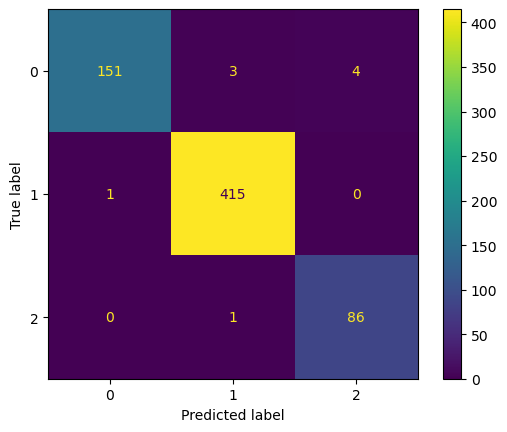

In [199]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_stack)

In [253]:
from PIL import Image

image_path = 'Downloads/capsule endoscopy/Ulcer/Ulcer_2024-08-07-08-25-38_11087.bmp'
image = Image.open(image_path)
image_resized = image.resize((64, 64))
image_array = np.array(image_resized)
if len(image_array.shape) == 2:  # Grayscale image
    image_array = np.expand_dims(image_array, axis=-1) 

image_flattened = image_array.flatten()
prediction = stack.predict(image_flattened.reshape(1, -1))

print(prediction)


[2]


In [215]:
import matplotlib.pyplot as plt

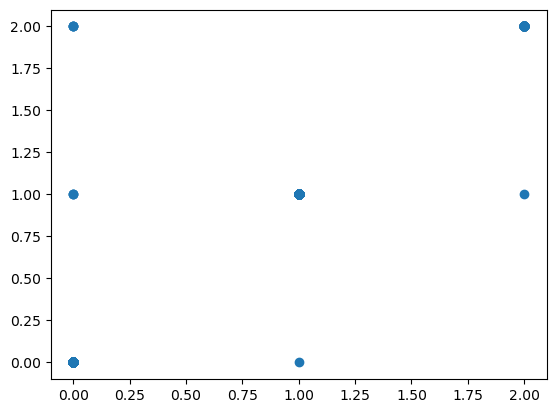

In [217]:
plt.scatter(y_test,y_pred_stack)

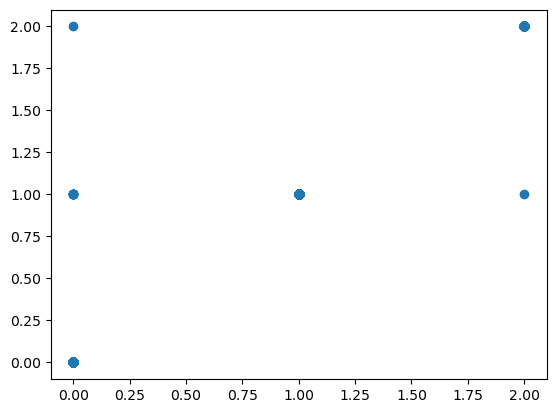

In [219]:
plt.scatter(y_test,y_pred_xgb)

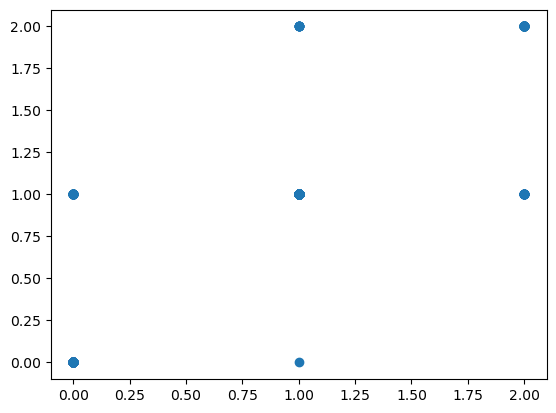

In [221]:
plt.scatter(y_test,y_pred_knn)

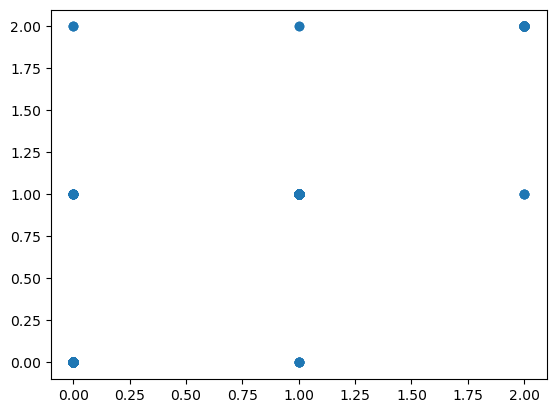

In [223]:
plt.scatter(y_test,y_pred_dt)

In [261]:

image_path = 'Downloads/test subject.jpg'
image = Image.open(image_path)
image_resized = image.resize((64, 64))
image_array = np.array(image_resized)

if len(image_array.shape) == 2: 
    image_array = np.expand_dims(image_array, axis=-1) 
image_flattened = image_array.flatten()

prediction = stack.predict(image_flattened.reshape(1, -1))

image.show()
print(prediction)


[0]
